In [1]:
import pandas as pd

In [2]:
import geopandas

In [3]:
import glob

In [4]:
from geopandas import points_from_xy

In [5]:
import seaborn as sns

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
import numpy as np

## Loading PoliceData2021 files

In [8]:
data_files = glob.glob('PoliceData2021/*.csv')

In [9]:
dc1 = pd.concat(
        (pd.read_csv(filename) for filename in data_files),
        ignore_index= True)

In [10]:
dc1.head(3)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2021-01,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
1,NaN,2021-01,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
2,19f06058a3b0aa0e79eabc017b48862f2a6a06645b2f5c...,2021-01,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,NaN


In [11]:
dc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079267 entries, 0 to 1079266
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Crime ID               776813 non-null   object 
 1   Month                  1079267 non-null  object 
 2   Reported by            1079267 non-null  object 
 3   Falls within           1079267 non-null  object 
 4   Longitude              1063568 non-null  float64
 5   Latitude               1063568 non-null  float64
 6   Location               1079267 non-null  object 
 7   LSOA code              1063568 non-null  object 
 8   LSOA name              1063568 non-null  object 
 9   Crime type             1079267 non-null  object 
 10  Last outcome category  776813 non-null   object 
 11  Context                0 non-null        float64
dtypes: float64(3), object(9)
memory usage: 98.8+ MB


## Locate the crimes records 

In [12]:
# New dataframe with the fields we need

dc2 = dc1[['Longitude','Latitude','Crime type']]

In [13]:
dc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079267 entries, 0 to 1079266
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Longitude   1063568 non-null  float64
 1   Latitude    1063568 non-null  float64
 2   Crime type  1079267 non-null  object 
dtypes: float64(2), object(1)
memory usage: 24.7+ MB


In [14]:
# turn longitude and latitude into points
dc3 = geopandas.GeoDataFrame(dc2, crs='OSGB36',
        geometry=points_from_xy(dc2["Longitude"], dc2["Latitude"]),)

In [15]:
dc4 = dc3.to_crs('EPSG:27700')

In [16]:
dc4.head()

,Longitude,Latitude,Crime type,geometry
0,-0.098572,51.516767,Anti-social behaviour,POINT (531916.787 181527.803)
1,-0.097601,51.520699,Anti-social behaviour,POINT (531972.779 181966.754)
2,-0.098572,51.516767,Other theft,POINT (531916.787 181527.803)
3,-0.097334,51.521567,Other theft,POINT (531988.79 182063.749)
4,-0.097601,51.520699,Shoplifting,POINT (531972.779 181966.754)


In [17]:
dc4.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1079267 entries, 0 to 1079266
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   Longitude   1063568 non-null  float64 
 1   Latitude    1063568 non-null  float64 
 2   Crime type  1079267 non-null  object  
 3   geometry    1079267 non-null  geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 32.9+ MB


In [18]:
gdf = geopandas.read_file('London_MSOA.shp')

In [19]:
gdf.head()

,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E02000001,City of London 001,532384,181355,-0.093490,51.5156,1a2c7a3b-631d-4efc-8ddc-b1c4d354fb0d,"POLYGON ((532153.703 182165.155, 532158.25 182..."
1,E02000002,Barking and Dagenham 001,548267,189685,0.138756,51.5865,5a46ef58-9e06-4afd-9a7d-d299d2e522d3,"POLYGON ((548881.304 190819.98, 548881.125 190..."
2,E02000003,Barking and Dagenham 002,548259,188520,0.138149,51.5760,780f3795-87fd-498e-b117-7e8361f3587d,"POLYGON ((548958.555 189072.176, 548954.517 18..."
3,E02000004,Barking and Dagenham 003,551004,186412,0.176828,51.5564,2a558db9-3725-46e7-9cbd-348766244e71,"POLYGON ((551550.056 187364.705, 551528.633 18..."
4,E02000005,Barking and Dagenham 004,548733,186824,0.144267,51.5607,f09f3af8-753a-433b-ae45-5a3d0281f34d,"POLYGON ((549237.051 187627.941, 549241.319 18..."


In [20]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MSOA21CD  1002 non-null   object  
 1   MSOA21NM  1002 non-null   object  
 2   BNG_E     1002 non-null   int64   
 3   BNG_N     1002 non-null   int64   
 4   LONG      1002 non-null   float64 
 5   LAT       1002 non-null   float64 
 6   GlobalID  1002 non-null   object  
 7   geometry  1002 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 62.8+ KB


In [21]:
gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [22]:
dc5 = geopandas.sjoin(dc4, gdf, how='left', predicate="within")

In [23]:
dc5.head()

,Longitude,Latitude,Crime type,geometry,index_right,MSOA21CD,MSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID
0,-0.098572,51.516767,Anti-social behaviour,POINT (531916.787 181527.803),0.0,E02000001,City of London 001,532384.0,181355.0,-0.09349,51.5156,1a2c7a3b-631d-4efc-8ddc-b1c4d354fb0d
1,-0.097601,51.520699,Anti-social behaviour,POINT (531972.779 181966.754),543.0,E02000575,Islington 022,531574.0,182213.0,-0.10483,51.5235,66304b48-7d65-4d81-a7dc-591a4fb52608
2,-0.098572,51.516767,Other theft,POINT (531916.787 181527.803),0.0,E02000001,City of London 001,532384.0,181355.0,-0.09349,51.5156,1a2c7a3b-631d-4efc-8ddc-b1c4d354fb0d
3,-0.097334,51.521567,Other theft,POINT (531988.79 182063.749),543.0,E02000575,Islington 022,531574.0,182213.0,-0.10483,51.5235,66304b48-7d65-4d81-a7dc-591a4fb52608
4,-0.097601,51.520699,Shoplifting,POINT (531972.779 181966.754),543.0,E02000575,Islington 022,531574.0,182213.0,-0.10483,51.5235,66304b48-7d65-4d81-a7dc-591a4fb52608


In [24]:
dc5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1079267 entries, 0 to 1079266
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   Longitude    1063568 non-null  float64 
 1   Latitude     1063568 non-null  float64 
 2   Crime type   1079267 non-null  object  
 3   geometry     1079267 non-null  geometry
 4   index_right  1058907 non-null  float64 
 5   MSOA21CD     1058907 non-null  object  
 6   MSOA21NM     1058907 non-null  object  
 7   BNG_E        1058907 non-null  float64 
 8   BNG_N        1058907 non-null  float64 
 9   LONG         1058907 non-null  float64 
 10  LAT          1058907 non-null  float64 
 11  GlobalID     1058907 non-null  object  
dtypes: float64(7), geometry(1), object(4)
memory usage: 107.0+ MB


In [25]:
dc6 = dc5[['MSOA21CD','MSOA21NM','Crime type']]

In [26]:
dc6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079267 entries, 0 to 1079266
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MSOA21CD    1058907 non-null  object
 1   MSOA21NM    1058907 non-null  object
 2   Crime type  1079267 non-null  object
dtypes: object(3)
memory usage: 32.9+ MB


20,360 crimes are reported without location or outside London. ~ 1.88%

In [27]:
dc7 = dc6.dropna()

In [28]:
dc7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058907 entries, 0 to 1077254
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MSOA21CD    1058907 non-null  object
 1   MSOA21NM    1058907 non-null  object
 2   Crime type  1058907 non-null  object
dtypes: object(3)
memory usage: 32.3+ MB


In [29]:
dc7.head()

,MSOA21CD,MSOA21NM,Crime type
0,E02000001,City of London 001,Anti-social behaviour
1,E02000575,Islington 022,Anti-social behaviour
2,E02000001,City of London 001,Other theft
3,E02000575,Islington 022,Other theft
4,E02000575,Islington 022,Shoplifting


## Aggregating by MSOA and crime type

In [30]:
dc0 = dc7.groupby(['MSOA21CD','MSOA21NM','Crime type']).size().reset_index(name='counts')

In [31]:
dc0.head(30)

,MSOA21CD,MSOA21NM,Crime type,counts
0,E02000001,City of London 001,Anti-social behaviour,1006
1,E02000001,City of London 001,Bicycle theft,283
2,E02000001,City of London 001,Burglary,191
3,E02000001,City of London 001,Criminal damage and arson,241
4,E02000001,City of London 001,Drugs,503
5,E02000001,City of London 001,Other crime,62
6,E02000001,City of London 001,Other theft,916
7,E02000001,City of London 001,Possession of weapons,42
8,E02000001,City of London 001,Public order,433
9,E02000001,City of London 001,Robbery,124


In [32]:
dc0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13787 entries, 0 to 13786
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSOA21CD    13787 non-null  object
 1   MSOA21NM    13787 non-null  object
 2   Crime type  13787 non-null  object
 3   counts      13787 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 431.0+ KB


## Total crimes reported

In [33]:
dctotal = dc0.groupby(['MSOA21CD','MSOA21NM'])['counts'].sum().reset_index(name='total_crimes')

In [34]:
dctotal.head()

,MSOA21CD,MSOA21NM,total_crimes
0,E02000001,City of London 001,6262
1,E02000002,Barking and Dagenham 001,829
2,E02000003,Barking and Dagenham 002,1223
3,E02000004,Barking and Dagenham 003,391
4,E02000005,Barking and Dagenham 004,1079


In [35]:
dctotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSOA21CD      1002 non-null   object
 1   MSOA21NM      1002 non-null   object
 2   total_crimes  1002 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


### Burglary

In [36]:
dcbur = dc0.loc[dc0['Crime type'] == 'Burglary']

In [37]:
dcbur.reset_index(drop= True, inplace= True)

In [38]:
dcbur.head()

,MSOA21CD,MSOA21NM,Crime type,counts
0,E02000001,City of London 001,Burglary,191
1,E02000002,Barking and Dagenham 001,Burglary,34
2,E02000003,Barking and Dagenham 002,Burglary,72
3,E02000004,Barking and Dagenham 003,Burglary,17
4,E02000005,Barking and Dagenham 004,Burglary,66


In [39]:
dcbur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSOA21CD    1002 non-null   object
 1   MSOA21NM    1002 non-null   object
 2   Crime type  1002 non-null   object
 3   counts      1002 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [40]:
# To use in the other df

dcb = dcbur[['MSOA21CD','counts']]

In [41]:
dcb.rename(columns= {'counts':'burglaries'}, inplace= True)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_17252\1502791949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcb.rename(columns= {'counts':'burglaries'}, inplace= True)


In [42]:
dcb.head()

,MSOA21CD,burglaries
0,E02000001,191
1,E02000002,34
2,E02000003,72
3,E02000004,17
4,E02000005,66


### Violence and sexual offences

In [43]:
dvso = dc0.loc[dc0['Crime type'] == 'Violence and sexual offences']

In [44]:
dvso.reset_index(drop= True, inplace= True)

In [45]:
dvso.tail()

,MSOA21CD,MSOA21NM,Crime type,counts
997,E02007111,Hackney 033,Violence and sexual offences,614
998,E02007112,Tower Hamlets 034,Violence and sexual offences,51
999,E02007113,Tower Hamlets 035,Violence and sexual offences,270
1000,E02007114,Tower Hamlets 036,Violence and sexual offences,151
1001,E02007115,Camden 029,Violence and sexual offences,418


In [46]:
dvso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSOA21CD    1002 non-null   object
 1   MSOA21NM    1002 non-null   object
 2   Crime type  1002 non-null   object
 3   counts      1002 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [47]:
# To use in the other df

dcvs = dvso[['MSOA21CD','counts']]

In [48]:
dcvs.rename(columns= {'counts':'VSO'}, inplace= True)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_17252\3132697462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcvs.rename(columns= {'counts':'VSO'}, inplace= True)


In [49]:
dcvs.head()

,MSOA21CD,VSO
0,E02000001,1027
1,E02000002,260
2,E02000003,309
3,E02000004,156
4,E02000005,269


### Anti-social behaviour

In [50]:
dasb = (dc0.loc[dc0['Crime type'] == 'Anti-social behaviour']).reset_index(drop= True)

In [51]:
dasb.tail()

,MSOA21CD,MSOA21NM,Crime type,counts
997,E02007111,Hackney 033,Anti-social behaviour,810
998,E02007112,Tower Hamlets 034,Anti-social behaviour,90
999,E02007113,Tower Hamlets 035,Anti-social behaviour,560
1000,E02007114,Tower Hamlets 036,Anti-social behaviour,275
1001,E02007115,Camden 029,Anti-social behaviour,760


In [52]:
dasb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSOA21CD    1002 non-null   object
 1   MSOA21NM    1002 non-null   object
 2   Crime type  1002 non-null   object
 3   counts      1002 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [53]:
# To use in the other df

dca = dasb[['MSOA21CD','counts']]

In [54]:
dca.rename(columns= {'counts':'ASB'}, inplace= True)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_17252\4186639073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dca.rename(columns= {'counts':'ASB'}, inplace= True)


In [55]:
dca.head()

,MSOA21CD,ASB
0,E02000001,1006
1,E02000002,210
2,E02000003,335
3,E02000004,76
4,E02000005,291


## New crimes counts dataframe

In [56]:
ndc = dctotal.merge(dcb, on= 'MSOA21CD') 

In [57]:
ndc = ndc.merge(dcvs, on= 'MSOA21CD')

In [58]:
ndc = ndc.merge(dca, on= 'MSOA21CD')

In [59]:
ndc.head()

,MSOA21CD,MSOA21NM,total_crimes,burglaries,VSO,ASB
0,E02000001,City of London 001,6262,191,1027,1006
1,E02000002,Barking and Dagenham 001,829,34,260,210
2,E02000003,Barking and Dagenham 002,1223,72,309,335
3,E02000004,Barking and Dagenham 003,391,17,156,76
4,E02000005,Barking and Dagenham 004,1079,66,269,291


In [60]:
ndc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSOA21CD      1002 non-null   object
 1   MSOA21NM      1002 non-null   object
 2   total_crimes  1002 non-null   int64 
 3   burglaries    1002 non-null   int64 
 4   VSO           1002 non-null   int64 
 5   ASB           1002 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.1+ KB


<Axes: >

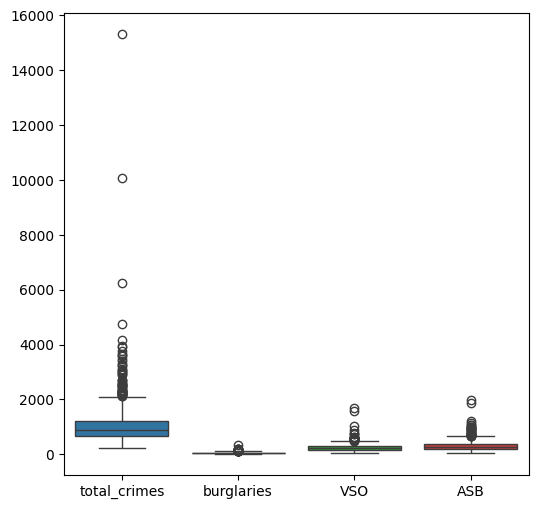

In [61]:
fig, axes = plt.subplots(figsize=(6,6))
sns.boxplot(ndc)

## Crime rates

In [62]:
dpop = pd.read_csv('est-population-2021.csv')

In [63]:
dpop.head()

,MSOA 2021 Code,Total
0,E02000001,8689
1,E02000002,8366
2,E02000003,11588
3,E02000004,6767
4,E02000005,11070


In [64]:
dpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MSOA 2021 Code  1002 non-null   object
 1   Total           1002 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [65]:
dpop.rename(columns= {'MSOA 2021 Code':'MSOA21CD', 'Total':'EstPop'}, inplace= True)

In [66]:
dpop.head()

,MSOA21CD,EstPop
0,E02000001,8689
1,E02000002,8366
2,E02000003,11588
3,E02000004,6767
4,E02000005,11070


In [67]:
ndc2 = ndc.merge(dpop, on= 'MSOA21CD')

In [68]:
ndc2.head()

,MSOA21CD,MSOA21NM,total_crimes,burglaries,VSO,ASB,EstPop
0,E02000001,City of London 001,6262,191,1027,1006,8689
1,E02000002,Barking and Dagenham 001,829,34,260,210,8366
2,E02000003,Barking and Dagenham 002,1223,72,309,335,11588
3,E02000004,Barking and Dagenham 003,391,17,156,76,6767
4,E02000005,Barking and Dagenham 004,1079,66,269,291,11070


In [69]:
ndc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSOA21CD      1002 non-null   object
 1   MSOA21NM      1002 non-null   object
 2   total_crimes  1002 non-null   int64 
 3   burglaries    1002 non-null   int64 
 4   VSO           1002 non-null   int64 
 5   ASB           1002 non-null   int64 
 6   EstPop        1002 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [70]:
dwe = pd.read_csv('total_dwellings.csv')

In [71]:
dwe.head()

,MSOA21CD,Dwellings
0,E02000002,2951.0
1,E02000003,4111.0
2,E02000004,2388.0
3,E02000005,3769.0
4,E02000007,3797.0


In [72]:
dwe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MSOA21CD   1006 non-null   object 
 1   Dwellings  1002 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [73]:
ndc3 = ndc2.merge(dwe, on= 'MSOA21CD')

In [74]:
ndc3.head()

,MSOA21CD,MSOA21NM,total_crimes,burglaries,VSO,ASB,EstPop,Dwellings
0,E02000001,City of London 001,6262,191,1027,1006,8689,7323.0
1,E02000002,Barking and Dagenham 001,829,34,260,210,8366,2951.0
2,E02000003,Barking and Dagenham 002,1223,72,309,335,11588,4111.0
3,E02000004,Barking and Dagenham 003,391,17,156,76,6767,2388.0
4,E02000005,Barking and Dagenham 004,1079,66,269,291,11070,3769.0


In [75]:
ndc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSOA21CD      1002 non-null   object 
 1   MSOA21NM      1002 non-null   object 
 2   total_crimes  1002 non-null   int64  
 3   burglaries    1002 non-null   int64  
 4   VSO           1002 non-null   int64  
 5   ASB           1002 non-null   int64  
 6   EstPop        1002 non-null   int64  
 7   Dwellings     1002 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.8+ KB


### Rates

In [76]:
pop = ndc3['EstPop']

In [77]:
dwell = ndc3['Dwellings']

In [78]:
total = ndc3['total_crimes']

In [79]:
burg = ndc3['burglaries']

In [80]:
vso = ndc3['VSO']

In [81]:
asb = ndc3['ASB']

In [82]:
ndc3.loc[:,'Tot-crimes/1kpop'] = total/(pop/1000)

In [83]:
ndc3.loc[:,'VSO/1kpop'] = vso/(pop/1000)

In [84]:
ndc3.loc[:,'ASB/1kpop'] = asb/(pop/1000)

In [85]:
ndc3.loc[:,'Burglaries/1kdwell'] = burg/(dwell/1000)

In [86]:
ndc3.head()

,MSOA21CD,MSOA21NM,total_crimes,burglaries,VSO,ASB,EstPop,Dwellings,Tot-crimes/1kpop,VSO/1kpop,ASB/1kpop,Burglaries/1kdwell
0,E02000001,City of London 001,6262,191,1027,1006,8689,7323.0,720.681321,118.195419,115.778571,26.082207
1,E02000002,Barking and Dagenham 001,829,34,260,210,8366,2951.0,99.091561,31.078174,25.101602,11.521518
2,E02000003,Barking and Dagenham 002,1223,72,309,335,11588,4111.0,105.540214,26.665516,28.909216,17.513987
3,E02000004,Barking and Dagenham 003,391,17,156,76,6767,2388.0,57.780405,23.053052,11.230974,7.118928
4,E02000005,Barking and Dagenham 004,1079,66,269,291,11070,3769.0,97.470641,24.299910,26.287263,17.511276


In [87]:
# New dataframe of crime rates

dcr = ndc3[['MSOA21CD','MSOA21NM','Tot-crimes/1kpop','VSO/1kpop','ASB/1kpop','Burglaries/1kdwell']]

In [88]:
dcr.head()

,MSOA21CD,MSOA21NM,Tot-crimes/1kpop,VSO/1kpop,ASB/1kpop,Burglaries/1kdwell
0,E02000001,City of London 001,720.681321,118.195419,115.778571,26.082207
1,E02000002,Barking and Dagenham 001,99.091561,31.078174,25.101602,11.521518
2,E02000003,Barking and Dagenham 002,105.540214,26.665516,28.909216,17.513987
3,E02000004,Barking and Dagenham 003,57.780405,23.053052,11.230974,7.118928
4,E02000005,Barking and Dagenham 004,97.470641,24.299910,26.287263,17.511276


In [89]:
dcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSOA21CD            1002 non-null   object 
 1   MSOA21NM            1002 non-null   object 
 2   Tot-crimes/1kpop    1002 non-null   float64
 3   VSO/1kpop           1002 non-null   float64
 4   ASB/1kpop           1002 non-null   float64
 5   Burglaries/1kdwell  1002 non-null   float64
dtypes: float64(4), object(2)
memory usage: 47.1+ KB


### Visualisations

<Axes: >

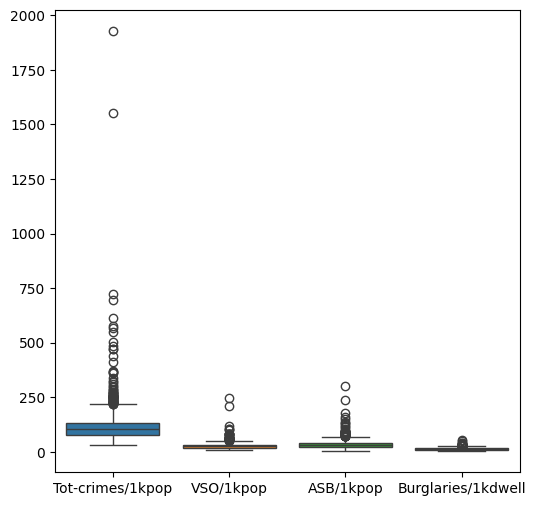

In [90]:
fig, axes = plt.subplots(figsize=(6,6))
sns.boxplot(dcr)

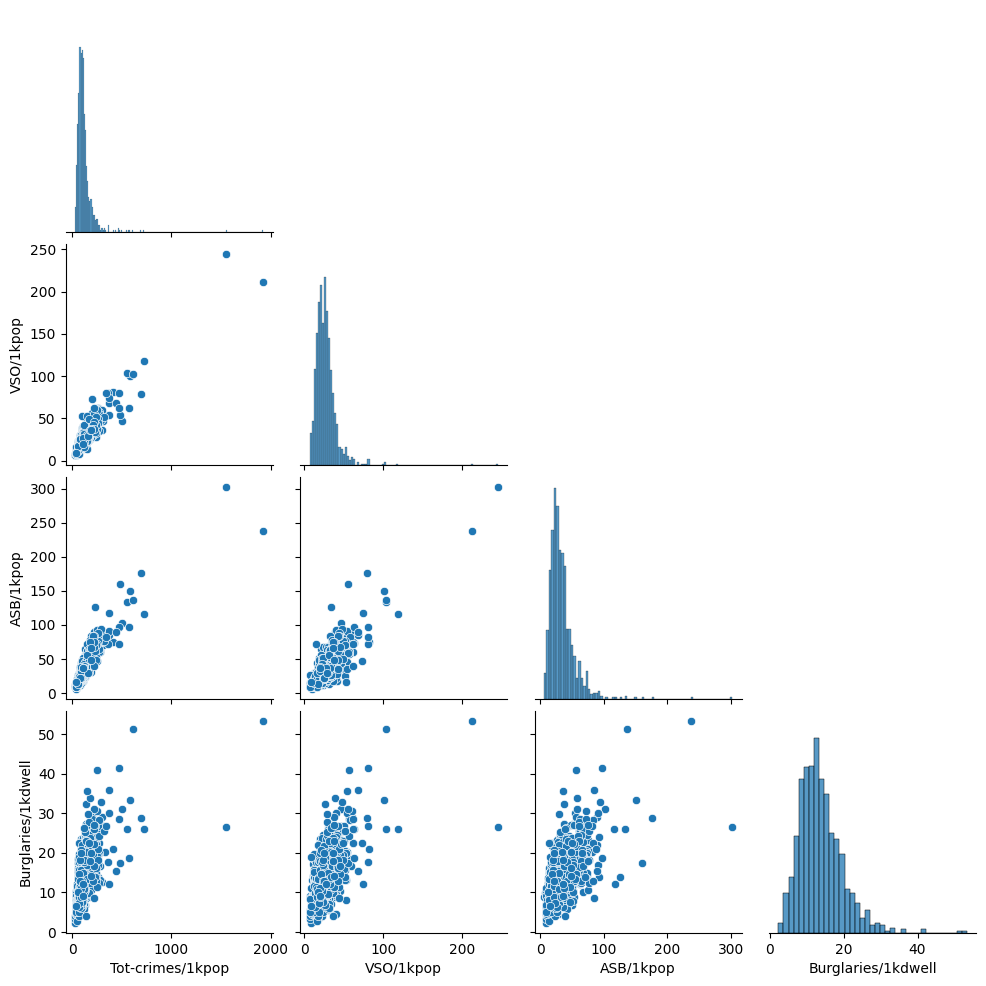

In [91]:
sns.pairplot(dcr, kind='scatter', corner=True)

In [92]:
dcr_num = dcr.select_dtypes(include= ['float64'])

In [93]:
dcr_num.head()

,Tot-crimes/1kpop,VSO/1kpop,ASB/1kpop,Burglaries/1kdwell
0,720.681321,118.195419,115.778571,26.082207
1,99.091561,31.078174,25.101602,11.521518
2,105.540214,26.665516,28.909216,17.513987
3,57.780405,23.053052,11.230974,7.118928
4,97.470641,24.299910,26.287263,17.511276


In [94]:
# Correlations between crime rates

correlation = dcr_num.corr()

In [95]:
correlation

,Tot-crimes/1kpop,VSO/1kpop,ASB/1kpop,Burglaries/1kdwell
Tot-crimes/1kpop,1.000000,0.909025,0.887447,0.578578
VSO/1kpop,0.909025,1.000000,0.837037,0.571136
ASB/1kpop,0.887447,0.837037,1.000000,0.595012
Burglaries/1kdwell,0.578578,0.571136,0.595012,1.000000


<Axes: >

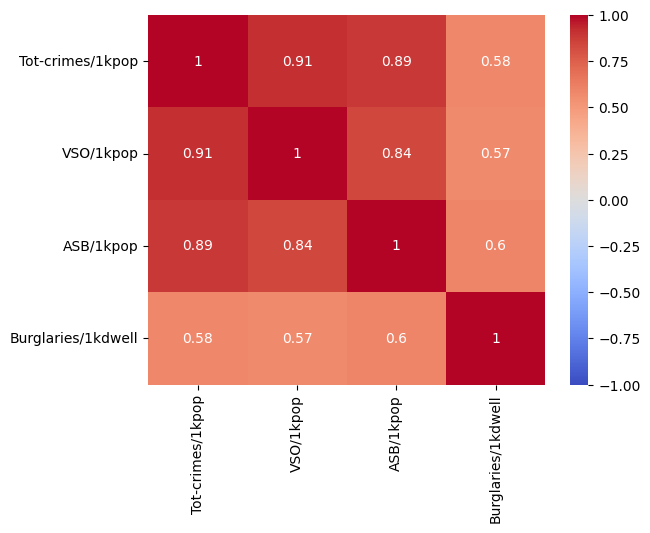

In [96]:
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

## Logarithmic transformation

In [97]:
dcr.loc[:,'Log10-tot'] = np.log10(dcr['Tot-crimes/1kpop'])

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_17252\1552662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcr.loc[:,'Log10-tot'] = np.log10(dcr['Tot-crimes/1kpop'])


In [98]:
dcr.loc[:,'Log10-VSO'] = np.log10(dcr['VSO/1kpop'])

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_17252\313788155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcr.loc[:,'Log10-VSO'] = np.log10(dcr['VSO/1kpop'])


In [99]:
dcr.loc[:,'Log10-ASB'] = np.log10(dcr['ASB/1kpop'])

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_17252\3076807695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcr.loc[:,'Log10-ASB'] = np.log10(dcr['ASB/1kpop'])


In [100]:
dcr.loc[:,'Log10-Bur'] = np.log10(dcr['Burglaries/1kdwell'])

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_17252\985962924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcr.loc[:,'Log10-Bur'] = np.log10(dcr['Burglaries/1kdwell'])


In [101]:
dcr.head()

,MSOA21CD,MSOA21NM,Tot-crimes/1kpop,VSO/1kpop,ASB/1kpop,Burglaries/1kdwell,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
0,E02000001,City of London 001,720.681321,118.195419,115.778571,26.082207,2.857743,2.072601,2.063628,1.416344
1,E02000002,Barking and Dagenham 001,99.091561,31.078174,25.101602,11.521518,1.996037,1.492455,1.399701,1.061510
2,E02000003,Barking and Dagenham 002,105.540214,26.665516,28.909216,17.513987,2.023418,1.425950,1.461036,1.243385
3,E02000004,Barking and Dagenham 003,57.780405,23.053052,11.230974,7.118928,1.761781,1.362728,1.050417,0.852415
4,E02000005,Barking and Dagenham 004,97.470641,24.299910,26.287263,17.511276,1.988874,1.385605,1.419745,1.243318


In [102]:
# New dataframe with log values

dcrl = dcr[['MSOA21CD','MSOA21NM','Log10-tot','Log10-VSO','Log10-ASB','Log10-Bur']]

In [103]:
dcrl.head()

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344
1,E02000002,Barking and Dagenham 001,1.996037,1.492455,1.399701,1.061510
2,E02000003,Barking and Dagenham 002,2.023418,1.425950,1.461036,1.243385
3,E02000004,Barking and Dagenham 003,1.761781,1.362728,1.050417,0.852415
4,E02000005,Barking and Dagenham 004,1.988874,1.385605,1.419745,1.243318


In [104]:
dcrl.describe()

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,2.021889,1.388100,1.475488,1.102106
std,0.209562,0.190877,0.224060,0.185440
min,1.465178,0.809611,0.767274,0.374816
25%,1.893502,1.271031,1.330601,0.994461
50%,2.011300,1.401225,1.469582,1.108923
75%,2.126959,1.502245,1.610112,1.225135
max,3.284774,2.388835,2.479761,1.726746


To graph the outliers in QGIS, I get the upper limit of each column:

In [105]:
IQRtot = dcrl['Log10-tot'].quantile(0.75)-dcrl['Log10-tot'].quantile(0.25)

In [106]:
IQRVSO = dcrl['Log10-VSO'].quantile(0.75)-dcrl['Log10-VSO'].quantile(0.25)

In [107]:
IQRASB = dcrl['Log10-ASB'].quantile(0.75)-dcrl['Log10-ASB'].quantile(0.25)

In [108]:
IQRbur = dcrl['Log10-Bur'].quantile(0.75)-dcrl['Log10-Bur'].quantile(0.25)

In [109]:
print("Upper limit tot: ", dcrl['Log10-tot'].quantile(0.75) + (1.5 * IQRtot))

Upper limit tot:  2.477143235916879


In [110]:
print("Upper limit VSO: ", dcrl['Log10-VSO'].quantile(0.75) + (1.5 * IQRVSO))

Upper limit VSO:  1.8490657200925646


In [111]:
print("Upper limit ASB: ", dcrl['Log10-ASB'].quantile(0.75) + (1.5 * IQRASB))

Upper limit ASB:  2.0293793952812456


In [112]:
print("Upper limit Bur: ", dcrl['Log10-Bur'].quantile(0.75) + (1.5 * IQRbur))

Upper limit Bur:  1.5711468181367332


In [113]:
dcrl_num = dcrl.select_dtypes(include= ['float64'])

In [114]:
dcrl_num.head(3)

,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
0,2.857743,2.072601,2.063628,1.416344
1,1.996037,1.492455,1.399701,1.061510
2,2.023418,1.425950,1.461036,1.243385


### Visualisations

<Axes: >

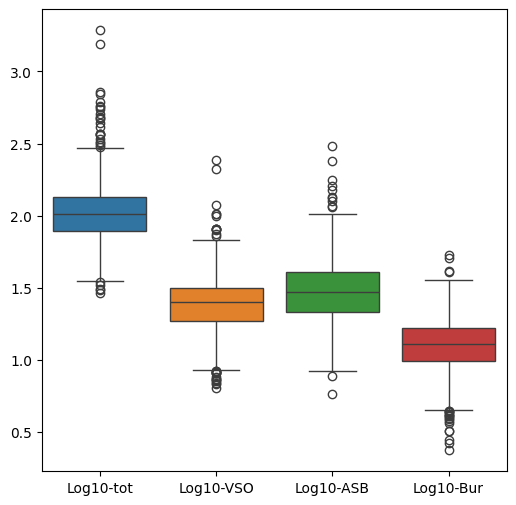

In [115]:
fig, axes = plt.subplots(figsize=(6,6))
sns.boxplot(dcrl)

In [116]:
dcrl.nlargest(5, 'Log10-tot')

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
920,E02000972,Westminster 013,3.284774,2.325568,2.375744,1.726746
925,E02000977,Westminster 018,3.190295,2.388835,2.479761,1.424477
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344
183,E02000193,Camden 028,2.841866,1.899963,2.244371,1.459906
997,E02007111,Hackney 033,2.786418,2.012412,2.132729,1.709594


In [117]:
dcrl.nlargest(5, 'Log10-VSO')

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
925,E02000977,Westminster 018,3.190295,2.388835,2.479761,1.424477
920,E02000972,Westminster 013,3.284774,2.325568,2.375744,1.726746
0,E02000001,City of London 001,2.857743,2.072601,2.063628,1.416344
949,E02006801,Lambeth 036,2.739067,2.013716,2.124158,1.416281
997,E02007111,Hackney 033,2.786418,2.012412,2.132729,1.709594


In [118]:
dcrl.nlargest(5, 'Log10-ASB')

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
925,E02000977,Westminster 018,3.190295,2.388835,2.479761,1.424477
920,E02000972,Westminster 013,3.284774,2.325568,2.375744,1.726746
183,E02000193,Camden 028,2.841866,1.899963,2.244371,1.459906
494,E02000524,Hillingdon 031,2.683685,1.737740,2.204163,1.242187
178,E02000186,Camden 021,2.761796,2.000557,2.176648,1.523710


Some areas of Westminster, City of London, Hackney and Camden appear in the above lists

In [119]:
dcrl.nlargest(5, 'Log10-Bur')

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
920,E02000972,Westminster 013,3.284774,2.325568,2.375744,1.726746
997,E02007111,Hackney 033,2.786418,2.012412,2.132729,1.709594
386,E02000412,Haringey 016,2.674157,1.905149,1.985917,1.618260
637,E02000672,Lewisham 020,2.398323,1.752448,1.754700,1.612496
734,E02000779,Redbridge 029,2.564439,1.831067,1.929937,1.554410


In [120]:
dcrl.nsmallest(5, 'Log10-Bur')

,MSOA21CD,MSOA21NM,Log10-tot,Log10-VSO,Log10-ASB,Log10-Bur
150,E02000157,Bromley 031,1.488663,0.923828,0.970824,0.374816
512,E02000544,Hounslow 019,1.652264,1.207811,1.128630,0.424957
72,E02000075,Bexley 011,1.622544,1.104805,1.073928,0.443563
154,E02000161,Bromley 035,1.465178,0.843967,0.977716,0.505087
80,E02000084,Bexley 020,1.692026,1.161659,1.094713,0.509640


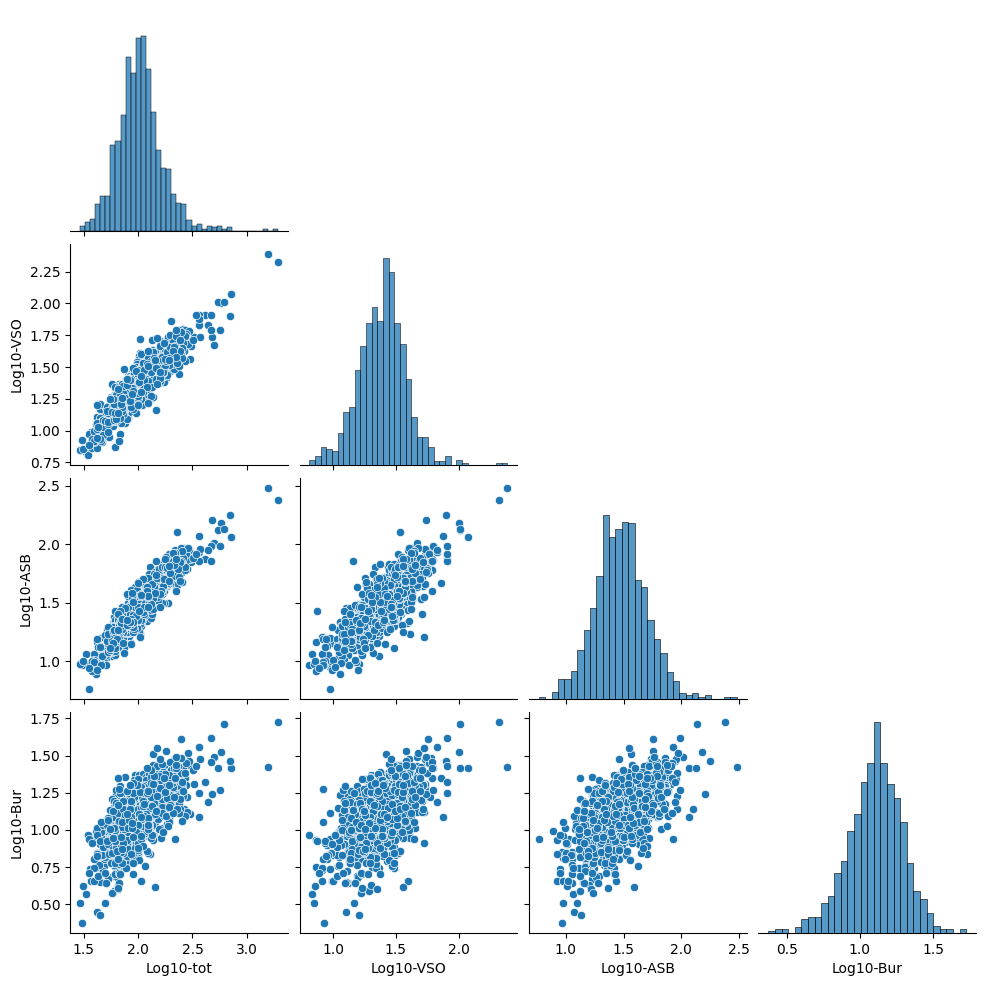

In [121]:
# To see distributions and scatter plots between columns

sns.pairplot(dcrl_num, kind='scatter', corner=True)

In [122]:
# Correlations between log of crime rates 

correlation1 = dcrl_num.corr()

<Axes: >

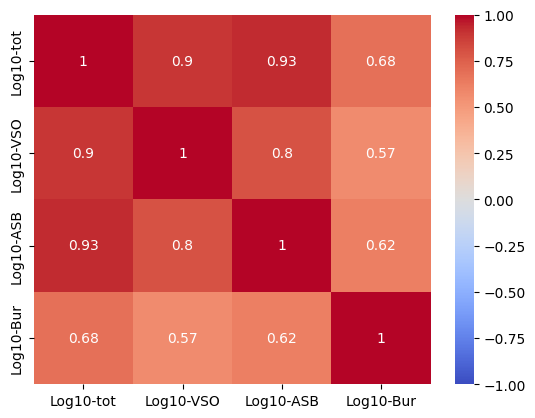

In [123]:
sns.heatmap(correlation1, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

We know the high correlations between crime types but I won't perform regressions between crime types, 
just to visualise the magnitude of VSO or ASB crimes have in the total crimes

In [124]:
# Exporting file

dcrl.to_csv('dcrl.csv', index=False)